# 6 brands - YSL, Prada, Gucci, Hermès, LV, Chanel

#### Keras World

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os #shutil
import os.path
import pathlib
from pathlib import Path
from glob import glob


import PIL
import PIL.Image
#import tensorflow as tf


import cv2
from keras.preprocessing.image import ImageDataGenerator

# 1. setup & EDA
- get data from path folder
(THIS TIME HAS TO SPLIT TRAIN AND TEST MY OWN - in the code modeling)

In [131]:
import pathlib
data_dir = pathlib.Path('../data/farfetch/bag_6')

#val_dir = pathlib.Path('../dataset/afhq/val')

In [126]:
image_count = len(list(data_dir.glob('**/*.png'))) 
print(image_count)

2154


In [49]:
#test = list(data_dir.glob('test/*'))  
#test
#PIL.Image.open(str(YSL[0]))

[PosixPath('../data/farfetch/bag/test/selfie.jpg')]

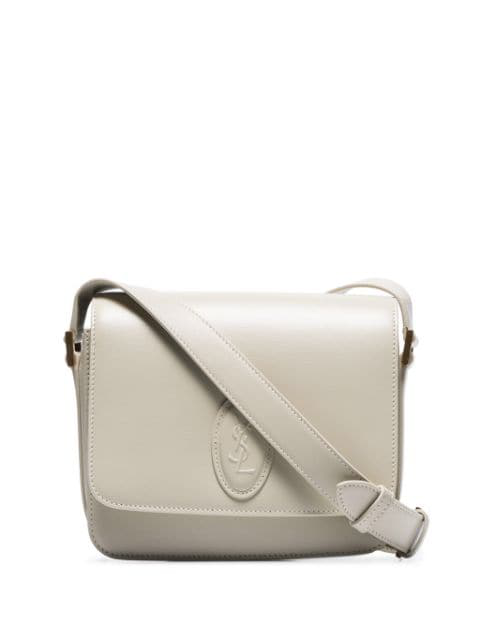

In [5]:
YSL = list(data_dir.glob('bag_YSL_/*'))   #('bag_YSL/*'))
#len(YSL)
PIL.Image.open(str(YSL[0]))

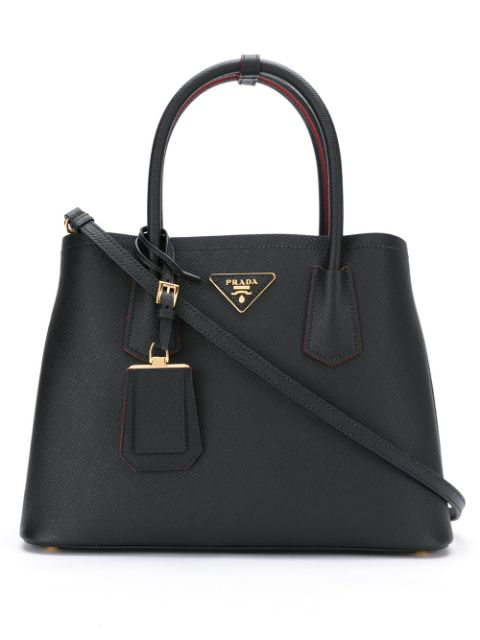

In [6]:
Prada = list(data_dir.glob('bag_Prada_/*'))
PIL.Image.open(str(Prada[0]))

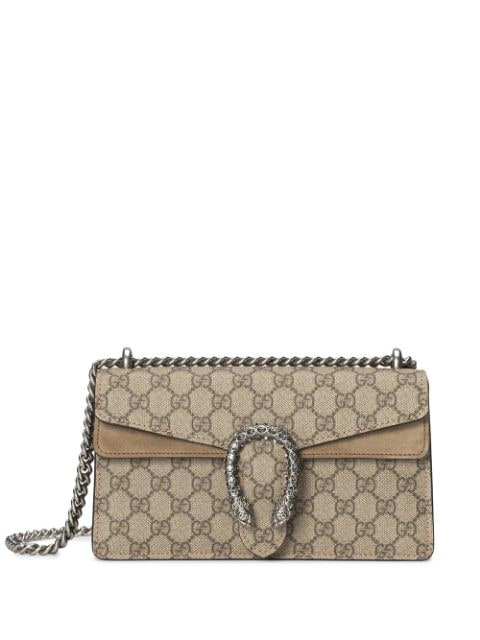

In [7]:
Gucci = list(data_dir.glob('bag_Gucci_/*'))
PIL.Image.open(str(Gucci[0]))

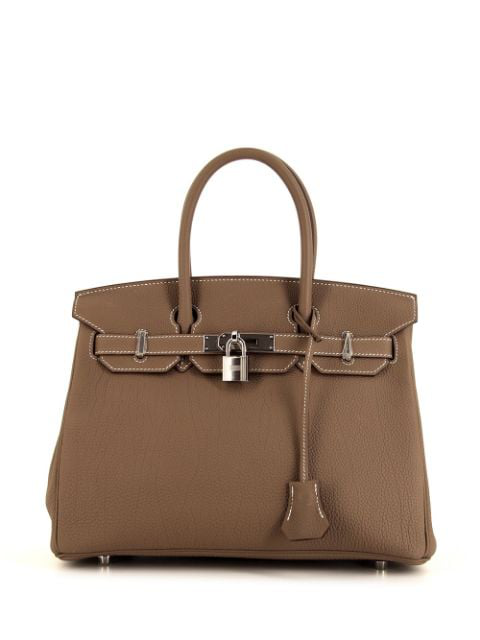

In [8]:
Hermes = list(data_dir.glob('bag_Hermes_/*'))
PIL.Image.open(str(Hermes[0]))

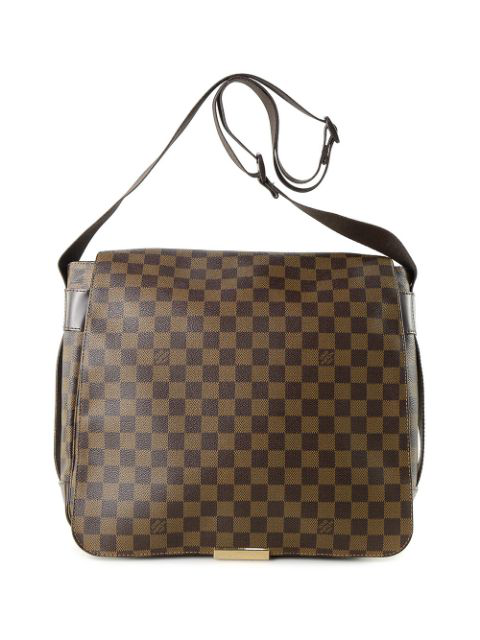

In [9]:
LV = list(data_dir.glob('bag_LV_/*'))
PIL.Image.open(str(LV[0]))

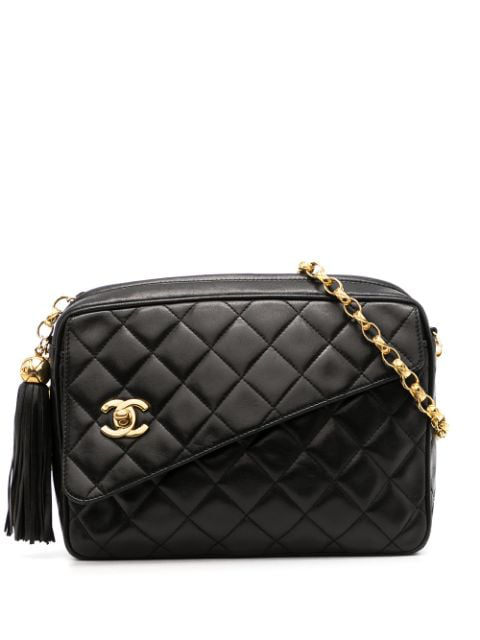

In [10]:
Chanel = list(data_dir.glob('bag_Chanel_/*'))
PIL.Image.open(str(Chanel[0]))

### distribution of the target variables

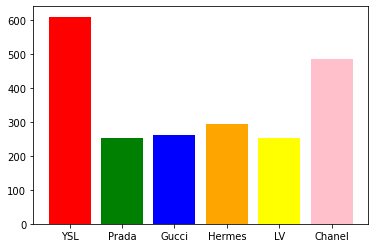

In [11]:
# create a dataset
height = [len(YSL), len(Prada), len(Gucci), len(Hermes), len(LV), len(Chanel)]
bars = ('YSL', 'Prada', 'Gucci', 'Hermes', 'LV', 'Chanel') 
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['red', 'green', 'blue', 'orange', 'yellow', 'pink'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [12]:
print(len(YSL), len(Prada), len(Gucci), len(Hermes), len(LV), len(Chanel))

610 252 261 295 252 484


# 2. Load images 
using keras.preprocessing & ImageDataGenerator

get a validation/test dataset

https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

In [13]:
image_gen = ImageDataGenerator(rescale=1./255,
                              validation_split=0.2)   # new: split

In [14]:
batch_size = 32  
img_height = 150  # 180  
img_width = 150   # 180   (choose to use 150 instead of 180 bcuz future match shape for VGG use)

In [15]:
# ds
train_generator = image_gen.flow_from_directory(data_dir,
                                          target_size=(img_height, img_width),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          subset='training',           # train_val_split
                                          class_mode='categorical')


Found 1725 images belonging to 6 classes.


In [16]:
val_generator = image_gen.flow_from_directory(data_dir,
                                        target_size=(img_height, img_width),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        subset='validation',
                                        class_mode='categorical')

Found 429 images belonging to 6 classes.


In [17]:
# #train_ds.class_names
train_generator.class_indices

{'bag_Chanel_': 0,
 'bag_Gucci_': 1,
 'bag_Hermes_': 2,
 'bag_LV_': 3,
 'bag_Prada_': 4,
 'bag_YSL_': 5}

In [18]:
train_generator.labels

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

# 3. Transfter Learning


#### VGG16


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer, Dropout 

In [20]:
from keras.applications.vgg16 import VGG16   

In [23]:
base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))   # TA： 32,32,3

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

model_v1 = Sequential(
                        [InputLayer(input_shape=(150,150,3)),  # TA: rescale  /=255    
                         base,
                         Flatten(),    
                         #Dense(1000, activation='relu'),  # add 1 more layer
                         Dense(1000, activation='relu'),   
                         Dense(1000, activation='relu'),   # add Dropout(0.05)             
                         Dense(6, activation='softmax')]
                       )

model_v1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [24]:
result_v1 = model_v1.fit_generator(train_generator, 
                                            validation_data=val_generator, 
                                            epochs=20,  # 10
                                            verbose=1)

Epoch 1/20
54/54 [==============================] - 233s 4s/step - loss: 4.7991 - accuracy: 0.1351 - val_loss: 1.6935 - val_accuracy: 0.2238
Epoch 2/20
54/54 [==============================] - 244s 5s/step - loss: 1.5824 - accuracy: 0.3026 - val_loss: 1.5367 - val_accuracy: 0.3497
Epoch 3/20
54/54 [==============================] - 233s 4s/step - loss: 1.4669 - accuracy: 0.3867 - val_loss: 1.3825 - val_accuracy: 0.4406
Epoch 4/20
54/54 [==============================] - 212s 4s/step - loss: 1.4225 - accuracy: 0.4263 - val_loss: 1.2854 - val_accuracy: 0.5152
Epoch 5/20
54/54 [==============================] - 211s 4s/step - loss: 1.2668 - accuracy: 0.4883 - val_loss: 1.1490 - val_accuracy: 0.5828
Epoch 6/20
54/54 [==============================] - 2941s 55s/step - loss: 1.2525 - accuracy: 0.5698 - val_loss: 1.2951 - val_accuracy: 0.4825
Epoch 7/20
54/54 [==============================] - 211s 4s/step - loss: 1.1840 - accuracy: 0.5109 - val_loss: 1.2231 - val_accuracy: 0.5711
Epoch 8/20


In [25]:
model_v1.save('ff_bag_6_v1.h5')

### add callback

In [26]:
result_vc1 = model_v1.fit_generator(                
        train_generator, validation_data=val_generator , epochs=100,  verbose=1,   # batch_size =100, 
        callbacks=[
            keras.callbacks.EarlyStopping(patience=4, verbose=1, restore_best_weights=True),  # to find the best Epochs
            keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),             #  to find the best Learning Rate   # patience no. setup : ES > RedLR
        ])

Epoch 1/100
54/54 [==============================] - 213s 4s/step - loss: 0.2910 - accuracy: 0.8939 - val_loss: 0.7922 - val_accuracy: 0.7576
Epoch 2/100
54/54 [==============================] - 210s 4s/step - loss: 0.2746 - accuracy: 0.9049 - val_loss: 0.9054 - val_accuracy: 0.7273
Epoch 3/100
54/54 [==============================] - 211s 4s/step - loss: 0.2474 - accuracy: 0.9148 - val_loss: 1.0629 - val_accuracy: 0.7179
Epoch 4/100
54/54 [==============================] - 1511s 6s/step - loss: 0.1513 - accuracy: 0.9501 - val_loss: 0.9325 - val_accuracy: 0.7506

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/100
54/54 [==============================] - 210s 4s/step - loss: 0.1095 - accuracy: 0.9675 - val_loss: 0.8897 - val_accuracy: 0.7669
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping


In [27]:
model_v1.save('ff_bag_6_v2.h5')

In [ ]:
# + early stopping 
# add epochs 

# hint
#model.fit_generator(
    #train_generator,
    #steps_per_epoch = train_generator.samples // batch_size,
    #validation_data = validation_generator, 
    #validation_steps = validation_generator.samples // batch_size,
    #epochs = nb_epochs)

In [ ]:
Epoch 1/100
42/42 [==============================] - 222s 5s/step - loss: 0.7957 - accuracy: 0.6986 - val_loss: 0.9722 - val_accuracy: 0.6607
Epoch 2/100
42/42 [==============================] - 198s 5s/step - loss: 0.7889 - accuracy: 0.7038 - val_loss: 0.7991 - val_accuracy: 0.7207
Epoch 3/100
42/42 [==============================] - 196s 5s/step - loss: 0.6793 - accuracy: 0.7420 - val_loss: 0.8520 - val_accuracy: 0.6697
Epoch 4/100
42/42 [==============================] - 218s 5s/step - loss: 0.5544 - accuracy: 0.8025 - val_loss: 0.6892 - val_accuracy: 0.7658
Epoch 5/100
42/42 [==============================] - 214s 5s/step - loss: 0.5311 - accuracy: 0.8048 - val_loss: 0.7094 - val_accuracy: 0.7778
Epoch 6/100
42/42 [==============================] - 203s 5s/step - loss: 0.5068 - accuracy: 0.8272 - val_loss: 0.6126 - val_accuracy: 0.7988
Epoch 7/100
42/42 [==============================] - 209s 5s/step - loss: 0.4326 - accuracy: 0.8429 - val_loss: 0.6073 - val_accuracy: 0.8018
Epoch 8/100
42/42 [==============================] - 211s 5s/step - loss: 0.3809 - accuracy: 0.8654 - val_loss: 0.5753 - val_accuracy: 0.8078
Epoch 9/100
42/42 [==============================] - 208s 5s/step - loss: 0.3056 - accuracy: 0.8968 - val_loss: 0.7074 - val_accuracy: 0.8048
Epoch 10/100
42/42 [==============================] - 177s 4s/step - loss: 0.2968 - accuracy: 0.8930 - val_loss: 0.6826 - val_accuracy: 0.7988
Epoch 11/100
42/42 [==============================] - 176s 4s/step - loss: 0.2424 - accuracy: 0.9125 - val_loss: 0.6579 - val_accuracy: 0.8018

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 12/100
42/42 [==============================] - 1695s 41s/step - loss: 0.1694 - accuracy: 0.9417 - val_loss: 0.7582 - val_accuracy: 0.7838
Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping

# 4. image augmentation  
- since the dataset is small so i use this method to flip to increase dataset size
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

### preprocessing 1 : do image dataset train-test-split via data directory

In [141]:
import os
import numpy as np
import shutil
import random

root_dir = '/Users/sabrina/Metis/Projects/7_Project_Engineering/data/farfetch/bag_6/' # bag_8/

classes_dir = ['bag_Chanel_', 'bag_Gucci_', 'bag_Hermes_', 'bag_LV_', 'bag_YSL_', 'bag_Prada_'] #, 'bag_Fendi_', 'bag_Balenciaga_'] 

test_ratio = 0.20

In [142]:
for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'test/' + cls)
    
    src = root_dir + cls
    print(src)
    
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print("*****************************")
    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Testing: ', len(test_FileNames))
    print("*****************************")


    #lab = ['bag_Chanel_', 'bag_Gucci_', 'bag_Hermes_', 'bag_LV_', 'bag_YSL_', 'bag_Prada_']


    for name in train_FileNames:
        shutil.copy(name, root_dir +'train/' + cls)
        #for i in lab:
            #shutil.copy(name, root_dir +'train/' + i)

    for name in test_FileNames:
        shutil.copy(name, root_dir +'test/' + cls)
        #for i in lab:
            #shutil.copy(name, root_dir +'test/' + i)
    print(f"{cls} : Copying Done!")
    print("*********************************************************************************")

/Users/sabrina/Metis/Projects/7_Project_Engineering/data/farfetch/bag_/bag_Chanel_
*****************************
Total images:  484
Training:  387
Testing:  97
*****************************
bag_Chanel_ : Copying Done!
*********************************************************************************
/Users/sabrina/Metis/Projects/7_Project_Engineering/data/farfetch/bag_/bag_Gucci_
*****************************
Total images:  262
Training:  209
Testing:  53
*****************************
bag_Gucci_ : Copying Done!
*********************************************************************************
/Users/sabrina/Metis/Projects/7_Project_Engineering/data/farfetch/bag_/bag_Hermes_
*****************************
Total images:  295
Training:  236
Testing:  59
*****************************
bag_Hermes_ : Copying Done!
*********************************************************************************
/Users/sabrina/Metis/Projects/7_Project_Engineering/data/farfetch/bag_/bag_LV_
***********************



### preprocessing 2 : data generator aug

In [96]:
train_datagen = ImageDataGenerator(
      rescale=1./255,  
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,  # ok to try upside down 
      fill_mode='nearest')


# # Note that the validation data should not be augmented!  -> val no no , only training data for fliping
val_datagen = ImageDataGenerator(rescale=1./255)

In [92]:
train_dir = pathlib.Path('../data/farfetch/bag_6_img_aug/train')  

In [93]:
val_dir = pathlib.Path('../data/farfetch/bag_6_img_aug/test')

In [95]:
train_generator_aug = train_datagen.flow_from_directory( 
        train_dir,  
        target_size=(150, 150),
        batch_size=20,  #32
        class_mode = 'categorical')


val_generator_aug = val_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150),
        batch_size=20,  #32
        class_mode = 'categorical')

# TAQ: why same images number as before after generator_aug? (1725, 429)

Found 1721 images belonging to 6 classes.
Found 433 images belonging to 6 classes.


### start to train model 

In [97]:
result_aug = model_v1.fit_generator(train_generator_aug, 
                         validation_data=val_generator_aug , 
                         epochs=10, 
                         verbose=1)

Epoch 1/10
87/87 [==============================] - 262s 3s/step - loss: 1.3167 - accuracy: 0.5293 - val_loss: 0.3922 - val_accuracy: 0.8776
Epoch 2/10
87/87 [==============================] - 256s 3s/step - loss: 1.1377 - accuracy: 0.5683 - val_loss: 0.4344 - val_accuracy: 0.8591
Epoch 3/10
87/87 [==============================] - 250s 3s/step - loss: 1.0497 - accuracy: 0.6165 - val_loss: 0.3200 - val_accuracy: 0.8938
Epoch 4/10
87/87 [==============================] - 310s 4s/step - loss: 1.0440 - accuracy: 0.6299 - val_loss: 0.3705 - val_accuracy: 0.8915
Epoch 5/10
87/87 [==============================] - 253s 3s/step - loss: 1.0202 - accuracy: 0.6171 - val_loss: 0.3352 - val_accuracy: 0.8868
Epoch 6/10
87/87 [==============================] - 275s 3s/step - loss: 0.9815 - accuracy: 0.6415 - val_loss: 0.3857 - val_accuracy: 0.8822
Epoch 7/10
87/87 [==============================] - 267s 3s/step - loss: 0.9324 - accuracy: 0.6566 - val_loss: 0.3236 - val_accuracy: 0.9053
Epoch 8/10
87

In [98]:
model_v1.save('ff_bag_6_v3.h5')

In [99]:
# add callback / dropout

result_aug_call = model_v1.fit_generator(         # class_weight=None,       
        train_generator_aug, validation_data=val_generator_aug , epochs=100,  verbose=1,  
        callbacks=[
            keras.callbacks.EarlyStopping(patience=4, verbose=1, restore_best_weights=True),  
            keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),             
        ])



Epoch 1/100
87/87 [==============================] - 306s 4s/step - loss: 0.8791 - accuracy: 0.6822 - val_loss: 0.3771 - val_accuracy: 0.8730
Epoch 2/100
87/87 [==============================] - 305s 4s/step - loss: 0.8561 - accuracy: 0.6851 - val_loss: 0.3590 - val_accuracy: 0.8776
Epoch 3/100
87/87 [==============================] - 305s 4s/step - loss: 0.8697 - accuracy: 0.6717 - val_loss: 0.3665 - val_accuracy: 0.8637
Epoch 4/100
87/87 [==============================] - 272s 3s/step - loss: 0.8493 - accuracy: 0.6909 - val_loss: 0.3661 - val_accuracy: 0.8891
Epoch 5/100
87/87 [==============================] - 261s 3s/step - loss: 0.8059 - accuracy: 0.6973 - val_loss: 0.3766 - val_accuracy: 0.8915

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/100
87/87 [==============================] - 259s 3s/step - loss: 0.7769 - accuracy: 0.7217 - val_loss: 0.3681 - val_accuracy: 0.8822
Restoring model weights from the end of the best epoch.
Epoch 00006

In [101]:
model_v1.save('ff_bag_6_v4.h5')

In [102]:
# TRY DROPOUT

model_v1.add(Dense(512, activation='relu'))
model_v1.add(Dropout(.05))   #
model_v1.add(Dense(6, activation='softmax')) 

result_aug_5 = model_v1.fit_generator(train_generator_aug, 
                         validation_data=val_generator_aug , 
                         epochs=10, 
                         verbose=1)

/Users/sabrina/.local/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
87/87 [==============================] - 294s 3s/step - loss: 0.8007 - accuracy: 0.7002 - val_loss: 0.3548 - val_accuracy: 0.8753
Epoch 2/10
87/87 [==============================] - 269s 3s/step - loss: 0.7761 - accuracy: 0.7159 - val_loss: 0.3551 - val_accuracy: 0.8684
Epoch 3/10
87/87 [==============================] - 262s 3s/step - loss: 0.8043 - accuracy: 0.7089 - val_loss: 0.3413 - val_accuracy: 0.8845
Epoch 4/10
87/87 [==============================] - 271s 3s/step - loss: 0.7806 - accuracy: 0.7281 - val_loss: 0.3261 - val_accuracy: 0.9030
Epoch 5/10
87/87 [==============================] - 314s 4s/step - loss: 0.7551 - accuracy: 0.7130 - val_loss: 0.3508 - val_accuracy: 0.8753
Epoch 6/10
87/87 [==============================] - 262s 3s/step - loss: 0.7589 - accuracy: 0.7374 - val_loss: 0.3475 - val_accuracy: 0.8891
Epoch 7/10
87/87 [==============================] - 270s 3s/step - loss: 0.7668 - accuracy: 0.7240 - val_loss: 0.3490 - val_accuracy: 0.8799
Epoch 8/10
87

In [103]:
model_v1.save('ff_bag_6_v5.h5')

In [ ]:
# TRY DROPOUT

model_v1.add(Dense(512, activation='relu'))
model_v1.add(Dropout(.1))   #
model_v1.add(Dense(6, activation='softmax')) 

result_aug_5 = model_v1.fit_generator(train_generator_aug, 
                         validation_data=val_generator_aug , 
                         epochs=10, 
                         verbose=1)

Epoch 1/10
18/87 [=====>........................] - ETA: 2:56 - loss: 0.7462 - accuracy: 0.7250

## ResNet

In [74]:
#from keras.applications.resnet50 import ResNet50
from keras.applications.resnet import ResNet50

In [75]:
base = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))   # TA： 32,32,3

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

model_r = Sequential(
                        [InputLayer(input_shape=(150,150,3)),  # TA: rescale  /=255    
                         base,
                         Flatten(),  # should be fine , or add layers
                         Dense(1000, activation='relu'),   
                         Dense(1000, activation='relu'),   # 2 dense is must bcuz VGG16 model Conv2D twice and Maxpooling -> get a lot more features
                         Dense(6, activation='softmax')]
                       )

model_r.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [76]:
result_r = model_r.fit_generator(train_generator, 
                                            validation_data=val_generator, 
                                            epochs=10, 
                                            verbose=1)

Epoch 1/10
40/40 [==============================] - 124s 3s/step - loss: 15.0982 - accuracy: 0.4830 - val_loss: 1.2849 - val_accuracy: 0.1835
Epoch 2/10
40/40 [==============================] - 104s 3s/step - loss: 1.7397 - accuracy: 0.4079 - val_loss: 1.1741 - val_accuracy: 0.6329
Epoch 3/10
40/40 [==============================] - 91s 2s/step - loss: 0.8283 - accuracy: 0.7068 - val_loss: 0.8847 - val_accuracy: 0.6329
Epoch 4/10
40/40 [==============================] - 99s 2s/step - loss: 0.9432 - accuracy: 0.6473 - val_loss: 1.0816 - val_accuracy: 0.6329
Epoch 5/10
40/40 [==============================] - 93s 2s/step - loss: 1.0724 - accuracy: 0.5922 - val_loss: 1.0266 - val_accuracy: 0.6329
Epoch 6/10
40/40 [==============================] - 107s 3s/step - loss: 0.9764 - accuracy: 0.7683 - val_loss: 0.9794 - val_accuracy: 0.6329
Epoch 7/10
40/40 [==============================] - 114s 3s/step - loss: 0.9126 - accuracy: 0.7691 - val_loss: 0.9516 - val_accuracy: 0.6329
Epoch 8/10
40/4